In [117]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import Classifiers
import Splitting_Funs
from itertools import product


# Reading train dataset
train = pd.read_csv('train_dataset_1.csv')
train['orderDate'] = pd.to_datetime(train['orderDate'], format = '%Y-%m-%d')
train['deliveryDate'] = pd.to_datetime(train['deliveryDate'], format = '%Y-%m-%d')
train['dateOfBirth'] = pd.to_datetime(train['dateOfBirth'], format = "%Y-%m-%d")
train['creationDate'] = pd.to_datetime(train['creationDate'], format = "%Y-%m-%d")

train = train.dropna()
train.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,interaction_1,interaction_2,interaction_3,interaction_4
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,...,0,0,0,0,0,0,0,0,1,0
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,...,0,0,0,0,0,0,0,0,1,0
2,3,2012-04-01,2012-04-03,71,9+,curry,21,69.95,794,Mrs,...,0,0,0,0,0,0,0,0,1,0
4,5,2012-04-02,1990-12-31,151,39,black,53,29.90,825,Mrs,...,1,0,0,0,0,0,0,0,0,0
5,6,2012-04-02,1990-12-31,598,xxl,brown,87,89.90,825,Mrs,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# Reading test dataset
test_dataset = pd.read_csv('test_dataset_1.csv')
test_dataset['orderDate'] = pd.to_datetime(test_dataset['orderDate'], format = '%Y-%m-%d')
test_dataset['deliveryDate'] = pd.to_datetime(test_dataset['deliveryDate'], format = '%Y-%m-%d')
test_dataset['dateOfBirth'] = pd.to_datetime(test_dataset['dateOfBirth'], format = "%Y-%m-%d")
test_dataset['creationDate'] = pd.to_datetime(test_dataset['creationDate'], format = "%Y-%m-%d")


test_dataset.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,interaction_1,interaction_2,interaction_3,interaction_4
0,1,2013-04-01,2013-04-03,2347,43,magenta,1,89.9,12489,Mrs,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-04-01,2013-04-03,2741,43,grey,1,99.9,12489,Mrs,...,0,0,0,0,0,0,0,0,1,0
2,3,2013-04-01,2013-04-03,2514,9,ecru,19,79.9,12489,Mrs,...,0,0,0,0,0,0,0,0,1,0
3,4,2013-04-01,2013-05-06,2347,42,brown,1,89.9,12489,Mrs,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-04-01,NaT,2690,43,grey,1,119.9,12489,Mrs,...,0,0,0,0,0,0,0,0,0,0


In [115]:
results = pd.read_csv('2014_realclass.txt', sep = ';')
results.head()

,orderItemID,returnShipment
0,1,1
1,2,1
2,3,1
3,4,0
4,5,0


In [120]:
X = train.drop(['returnShipment', 'orderItemID', 'orderDate', 'deliveryDate', 'itemID', 'color', 'manufacturerID', 
               'customerID', 'salutation', 'dateOfBirth', 'state', 'creationDate', 'size'], axis = 1)
Y = train['returnShipment']

test_dataset = test_dataset.drop(['orderItemID', 'orderDate', 'deliveryDate', 'itemID', 'color', 'manufacturerID', 
               'customerID', 'salutation', 'dateOfBirth', 'state', 'creationDate', 'size'], axis = 1)

X_train_1, X_val_1, X_test_1, Y_train, Y_val, Y_test = Splitting_Funs.train_validation_test(X, Y)

In [122]:
X_train = X_train_1[['interaction_1', 'item_highest_return_rate', 'days_to_delivery', 'interaction_3', 'price']]
X_val = X_val_1[['interaction_1', 'item_highest_return_rate', 'days_to_delivery', 'interaction_3', 'price']]
X_test = X_test_1[['interaction_1', 'item_highest_return_rate', 'days_to_delivery', 'interaction_3', 'price']]

test = test_dataset[['interaction_1', 'item_highest_return_rate', 'days_to_delivery', 'interaction_3', 'price']]


### Random Forest Model

In [8]:
RF = Classifiers.Classifier(X_train, Y_train, X_val, Y_val, 'RF')

Working on job 1 out of  48
Working on job 2 out of  48
Working on job 3 out of  48
Working on job 4 out of  48
Working on job 5 out of  48
Working on job 6 out of  48
Working on job 7 out of  48
Working on job 8 out of  48
Working on job 9 out of  48
Working on job 10 out of  48
Working on job 11 out of  48
Working on job 12 out of  48
Working on job 13 out of  48
Working on job 14 out of  48
Working on job 15 out of  48
Working on job 16 out of  48
Working on job 17 out of  48
Working on job 18 out of  48
Working on job 19 out of  48
Working on job 20 out of  48
Working on job 21 out of  48
Working on job 22 out of  48
Working on job 23 out of  48
Working on job 24 out of  48
Working on job 25 out of  48
Working on job 26 out of  48
Working on job 27 out of  48
Working on job 28 out of  48
Working on job 29 out of  48
Working on job 30 out of  48
Working on job 31 out of  48
Working on job 32 out of  48
Working on job 33 out of  48
Working on job 34 out of  48
Working on job 35 out o

In [9]:
RF.sort_values(by = 'evaluation', ascending = True).head(1)

,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,evaluation
13,100,5,5,10,7,18663.344171


### AdaBoost Model

In [10]:
Ada = Classifiers.Classifier(X_train, Y_train, X_val, Y_val, 'Ada')

Working on job 1 out of  48
Working on job 2 out of  48
Working on job 3 out of  48
Working on job 4 out of  48
Working on job 5 out of  48
Working on job 6 out of  48
Working on job 7 out of  48
Working on job 8 out of  48
Working on job 9 out of  48
Working on job 10 out of  48
Working on job 11 out of  48
Working on job 12 out of  48
Working on job 13 out of  48
Working on job 14 out of  48
Working on job 15 out of  48
Working on job 16 out of  48
Working on job 17 out of  48
Working on job 18 out of  48
Working on job 19 out of  48
Working on job 20 out of  48
Working on job 21 out of  48
Working on job 22 out of  48
Working on job 23 out of  48
Working on job 24 out of  48
Working on job 25 out of  48
Working on job 26 out of  48
Working on job 27 out of  48
Working on job 28 out of  48
Working on job 29 out of  48
Working on job 30 out of  48
Working on job 31 out of  48
Working on job 32 out of  48
Working on job 33 out of  48
Working on job 34 out of  48
Working on job 35 out o

In [11]:
Ada.sort_values(by = 'evaluation', ascending = True).head(1)

,n_estimators,max_features,max_depth,learning_rate,evaluation
12,100,5,5,0.001,18714.195401


### GradientBoost model

In [12]:
GB = Classifiers.Classifier(X_train, Y_train, X_val, Y_val, 'GB')

Working on job 1 out of  48
Working on job 2 out of  48
Working on job 3 out of  48
Working on job 4 out of  48
Working on job 5 out of  48
Working on job 6 out of  48
Working on job 7 out of  48
Working on job 8 out of  48
Working on job 9 out of  48
Working on job 10 out of  48
Working on job 11 out of  48
Working on job 12 out of  48
Working on job 13 out of  48
Working on job 14 out of  48
Working on job 15 out of  48
Working on job 16 out of  48
Working on job 17 out of  48
Working on job 18 out of  48
Working on job 19 out of  48
Working on job 20 out of  48
Working on job 21 out of  48
Working on job 22 out of  48
Working on job 23 out of  48
Working on job 24 out of  48
Working on job 25 out of  48
Working on job 26 out of  48
Working on job 27 out of  48
Working on job 28 out of  48
Working on job 29 out of  48
Working on job 30 out of  48
Working on job 31 out of  48
Working on job 32 out of  48
Working on job 33 out of  48
Working on job 34 out of  48
Working on job 35 out o

In [13]:
GB.sort_values(by = 'evaluation', ascending = True).head(1)

,n_estimators,learning_rate,max_features,max_depth,evaluation
44,500,1.0,3,3,18646.883321


### Support Vector Machine model

In [14]:
## svm = Classifiers.Classifier(X_train, Y_train, X_test, Y_test, 'svm')

In [15]:
## svm.sort_values(by = 'evaluation', ascending = True).head(1)

In [132]:
## Fitting the model (using the ith combination of hyper-parameters)
RF_md = RandomForestClassifier(n_estimators = 100,
                               max_features = 5,
                               max_depth = 5,
                               min_samples_split = 10,
                               min_samples_leaf = 7).fit(X_train, Y_train)

## Predicting on the val dataset
RF_test_pred = RF_md.predict_proba(X_test)[:, 1]
RF_pred = RF_md.predict_proba(test)[:,1]
RF_test_pred

array([0.5465439 , 0.52284022, 0.67837624, ..., 0.64888101, 0.54892564,
       0.4042038 ])

In [133]:
Ada_md = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_features = 5, max_depth = 5), 
                            n_estimators = 100, learning_rate = 0.001).fit(X_train, Y_train)

## Predicting on the val dataset
Ada_test_pred = Ada_md.predict_proba(X_test)[:, 1]
Ada_pred = Ada_md.predict_proba(test)[:, 1]
Ada_test_pred

array([0.54938935, 0.52156784, 0.6790406 , ..., 0.6382796 , 0.54938935,
       0.41719577])

In [ ]:
GB_md = GradientBoostingClassifier(n_estimators = 500,
                                   learning_rate = 1.0,
                                   max_features = 3,
                                   max_depth = 3).fit(X_train, Y_train)

## Predicting on the val dataset
GB_test_pred = GB_md.predict_proba(X_test)[:, 1]
GB_pred = GB_md.predict_proba(test)[:, 1]
GB_test_pred

In [ ]:
esemble_train = pd.DataFrame({'RF': RF_test_pred, 'Ada': Ada_test_pred, "GB": GB_test_pred, "Y_test": Y_test})
esemble_train.head()

In [ ]:
esemble_test = pd.DataFrame({"RF_preds_test_dataset": RF_pred, "Ada_preds_test_dataset": Ada_pred, "GB_preds_test_dataset": GB_pred})
esemble_test.head()

In [ ]:
import Ensemble

RF_test_pred = esemble_train['RF']
Ada_test_pred = esemble_train['Ada']
GB_test_pred = esemble_train['GB']
Y = esemble_train['Y_test']
RF_pred = esemble_test['RF_preds_test_dataset']
Ada_pred = esemble_test['Ada_preds_test_dataset']
GB_pred = esemble_test['GB_preds_test_dataset']

ensemble = Ensemble.ensemble(RF_test_pred, Ada_test_pred, GB_test_pred, Y, RF_pred, Ada_pred, GB_pred)

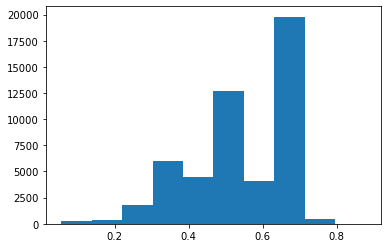

In [78]:
plt.hist(ensemble)
plt.show()

In [50]:
A = pd.DataFrame({'RF': RF_pred, 'Ada': Ada_pred, 'GB': GB_pred, 'Ensemble': ensemble})
A

,RF,Ada,GB,Ensemble
0,0.527870,0.525476,0.524720,0.546108
1,0.682628,0.676024,0.671261,0.680083
2,0.691042,0.690425,0.692869,0.687513
3,0.524733,0.525476,0.511998,0.495586
4,0.537247,0.543575,0.513207,0.508798
...,...,...,...,...
50073,0.517670,0.518480,0.527949,0.550625
50074,0.639356,0.606625,0.637103,0.637162
50075,0.696638,0.690425,0.705172,0.696419
50076,0.495141,0.485174,0.480108,0.481088


In [ ]:
results = results['returnShipment']

In [ ]:
# Predicting labels
RF_labels = precision_recall_cutoff.precision_recall_cutoff(results, ensemble)


print(classification_report(results, RF_labels))

In [ ]:
# Predicting labels
RF_labels = precision_recall_cutoff.precision_recall_cutoff(results, Ada_pred)


print(classification_report(results, RF_labels))

In [ ]:
X_train_2 = X_train_1[['interaction_1', 'item_highest_return_rate', 'days_to_delivery', 'interaction_3', 'price', 'Item_Average_Price']]
X_val_2 = X_val_1[['interaction_1', 'item_highest_return_rate', 'days_to_delivery', 'interaction_3', 'price', 'Item_Average_Price']]
X_test_2 = X_test_1[['interaction_1', 'item_highest_return_rate', 'days_to_delivery', 'interaction_3', 'price', 'Item_Average_Price']]

test_2 = test_dataset[['interaction_1', 'item_highest_return_rate', 'days_to_delivery', 'interaction_3', 'price', 'Item_Average_Price']]

In [ ]:
Ada_md = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_features = 5, max_depth = 5), 
                            n_estimators = 100, learning_rate = 0.001).fit(X_train_2, Y_train)

## Predicting on the val dataset
Ada_test_pred = Ada_md.predict_proba(X_test_2)[:, 1]
Ada_pred = Ada_md.predict_proba(test_2)[:, 1]

# Predicting labels
Ada_labels = precision_recall_cutoff.precision_recall_cutoff(results, Ada_test_pred)


print(classification_report(results, Ada_labels))

